In [52]:
# step1:read data in
#read data in
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score # use to calculate accuracy
from sklearn.model_selection import train_test_split
import time
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_columns', None)


#https://www.kaggle.com/lucidlenn/data-analysis-and-classification-using-xgboost

# sep: to decide the delimiter, default is comma in csv
# header: to decide whether the data frame has header or not, if don't want header,set header=None
# names = ['var1','var2',...] to list column names when header=None
# index_col is assign which column as index, 0 means to assign the first column as index, 1 means assign the second column to index
# skiprows: to skip rows when read in csv file, example skiprows=[0,3,5,10]
# skipfooter: number of lines at bottom of file to skip
# nrows: number of rows to read in 
# na_values: additional strings to recognize as NA, example na_values= ['NULL','NAN']
# parse_dates = assign a column list you want to parse dates on
# low_memory = False to ensure no mixed types of data. Pandas will guess the dtypes of each column, that is very memroy consuming and pandas need to read all the dataset from begin to the end to decide dtypes of each columns

loan = pd.read_csv("P:\Kaggle Project\loan\loan.csv",low_memory=False)
loan.info()
loan.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Current                    601779
Other                      225185
Late/default/chargedoff     60415
Name: loan_status_label, dtype: int64
Current               601779
Charged Off            45248
Late (31-120 days)     11591
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64
Current                    601779
Late/default/chargedoff     60415
Name: loan_status_label, dtype: int64
0    601779
1     60415
Name: target, dtype: int64


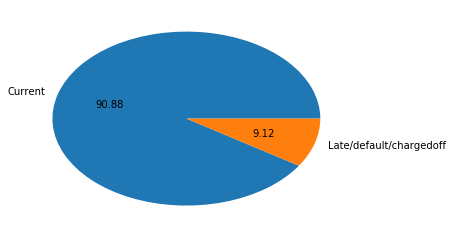

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662194 entries, 1 to 887378
Data columns (total 74 columns):
id                             662194 non-null int64
member_id                      662194 non-null int64
loan_amnt                      662194 non-null float64
funded_amnt                    662194 non-null float64
funded_amnt_inv                662194 non-null float64
term                           662194 non-null object
int_rate                       662194 non-null float64
installment                    662194 non-null float64
grade                          662194 non-null object
sub_grade                      662194 non-null object
emp_title                      622291 non-null object
emp_length                     625644 non-null object
home_ownership                 662194 non-null object
annual_inc                     662194 non-null float64
verification_status            662194 non-null object
issue_d                        662194 non-null object
pymnt_plan           

In [25]:
# step2: create target variable
# Target is loan_status
# our goal is to find whether loan will be late paid or charged off
def loandec(var):
    if var in ['Charged Off','Late (31-120 days)','Late (16-30 days)','Default']:
        return 'Late/default/chargedoff'
    elif var in ['Current']:
        return 'Current'
    else:
        return 'Other'
        
loan['loan_status_label'] = loan['loan_status'].apply(loandec)
print(loan['loan_status_label'].value_counts())


# remove others(already paid_full or close) from loan, not our interests
loan= loan.loc[loan['loan_status_label'] != 'Other',:]


# assign target 
def target_assign(var):
    if var in ['Late/default/chargedoff']:
        return 1 
    else:
        return 0 
    
loan['target'] = loan['loan_status_label'].apply(target_assign)

print(loan['loan_status'].value_counts())
print(loan['loan_status_label'].value_counts())
print(loan['target'].value_counts())

values = loan['loan_status_label'].value_counts().values
labels = loan['loan_status_label'].value_counts().index.values


plt.figure()
values = values
labels = labels
plt.pie(values, labels=labels, autopct='%.2f')
plt.show()

#drop loan_status_label and loan_status
loan.drop(columns=['loan_status_label','loan_status'],inplace=True)
loan.info()



In [27]:
# step 3: change dates to date format if there is any


loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%Y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%Y')
loan['next_pymnt_d'] = pd.to_datetime(loan['next_pymnt_d'],format='%b-%Y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%Y')



# crete 2 variables:
# how many days from last pyment made to issue date
# how many days from last credit pull to issue date
loan['issue_to_last_payment'] = (loan['last_pymnt_d'] - loan['issue_d']).dt.days
loan['issue_to_last_credit_pull'] = (loan['last_credit_pull_d']  - loan['issue_d']).dt.days

loan[['issue_d','last_pymnt_d','issue_to_last_payment','issue_to_last_credit_pull']].head()

,issue_d,last_pymnt_d,issue_to_last_payment,issue_to_last_credit_pull
1,2011-12-01,2013-04-01,487.0,640.0
4,2011-12-01,2016-01-01,1492.0,1492.0
6,2011-12-01,2016-01-01,1492.0,1492.0
8,2011-12-01,2012-04-01,122.0,244.0
9,2011-12-01,2012-11-01,336.0,456.0


In [28]:
# step 4: see how many level for each categorical variables
# decide those variables can delete
# decide which variable can change to numeric
# decide which variable can uppercase, lowercase - some data analysis

# copy loan data 
loan_ori = loan.copy()
pd.set_option('display.max_columns', None)  
loan_ori.head()

# take a look at all the numeric and object columns to see whether need to change data type or drop variables
variable_list_object = loan_ori.select_dtypes(include='object').columns.tolist()
variable_list_nonobject = loan_ori.select_dtypes(exclude='object').columns.tolist()

# test how many level off data for each column
for x in variable_list_object:
    print(x+" has "+str(loan_ori[x].value_counts(dropna=False).size)+" levels")
    print(pd.DataFrame(loan_ori[x].value_counts(dropna=False)).head(10))

# upper case emp_title, title
loan_ori['emp_title'] = loan_ori['emp_title'].str.upper()
loan_ori['title'] = loan_ori['title'].str.upper()




term has 2 levels
              term
 36 months  441155
 60 months  221039
grade has 7 levels
    grade
C  188194
B  183866
A  106612
D  106241
E   55740
F   17525
G    4016
sub_grade has 35 levels
    sub_grade
B4      40137
C1      39847
B3      39620
C2      39424
C3      38925
C4      38325
B5      35714
B2      34979
B1      33416
A5      33210
emp_title has 208480 levels
                  emp_title
NaN                   39903
Teacher               11564
Manager                9451
Owner                  4895
Registered Nurse       4732
RN                     4563
Supervisor             4199
Sales                  3594
Project Manager        3336
Driver                 3104
emp_length has 12 levels
           emp_length
10+ years      222555
2 years         57723
< 1 year        51803
3 years         51669
1 year          41888
5 years         39798
4 years         38048
NaN             36550
8 years         33389
7 years         32429
home_ownership has 6 levels
          home_ow

In [29]:
# change title, emp_title, zip_code to numeric data

for x in ['title', 'emp_title', 'zip_code']:
    table = loan_ori.groupby(x).agg({'target':np.mean}).reset_index()
    table.columns = [x,x+'_mean']
    print(table.head())
    loan_ori = pd.merge(loan_ori,table,on=x,how='left')

loan_ori[['title','title_mean', 'emp_title','emp_title_mean', 'zip_code','zip_code_mean']]


                                     title  title_mean
0                                  \tOTHER         1.0
1                        HITEK  EQUIPMENT          1.0
2                            CONSOLIDATION         0.0
3                                     LOAN         0.0
4    TO PAY OF MY BILL,AND ONE 22APR LOAND         0.0
                             emp_title  emp_title_mean
0               \tADV MTR PROJ FLD REP             0.0
1                MOTHER  THERESA  HOME             0.0
2      QUITMAN STREET COMMUNITY SCHOOL             0.0
3                    DAY CARE PROIVDER             0.0
4                         FIBRO SOURCE             0.0
  zip_code  zip_code_mean
0    007xx       0.000000
1    008xx       0.000000
2    010xx       0.091827
3    011xx       0.126543
4    012xx       0.089552


,title,title_mean,emp_title,emp_title_mean,zip_code,zip_code_mean
0,BIKE,0.250000,RYDER,0.200000,309xx,0.101190
1,PERSONAL,0.419753,UNIVERSITY MEDICAL GROUP,0.000000,972xx,0.079552
2,LOAN,0.344037,SOUTHERN STAR PHOTOGRAPHY,0.000000,280xx,0.082880
3,EXPAND BUSINESS & BUY DEBT PORTFOLIO,1.000000,NaN,NaN,958xx,0.114233
4,BUILDING MY CREDIT HISTORY.,1.000000,STARBUCKS,0.588235,774xx,0.071356
5,FREEDOM,0.287319,VA. DEPT OF CONSERVATION/RECREATION,1.000000,245xx,0.102190
6,OTHER LOAN,0.716667,SFMTA,1.000000,951xx,0.107721
7,DEBT CLEANUP,0.200000,OSRAM SYLVANIA,0.666667,335xx,0.093177
8,CASH,0.444444,BMG-EDUCATIONAL,1.000000,900xx,0.108337
9,CONSOLIDATION,0.284153,NYC TRANSIT,0.500000,103xx,0.109375


In [30]:
loan_ori.drop(columns=['title', 'emp_title', 'zip_code','url','desc','earliest_cr_line'],inplace=True)


In [31]:
# continue steps2: change categorical data to numeric
# change grade, emp_length, issue_d to number
def g(x):
    if x =='A':
        return 1
    elif x== 'B':
        return 2
    elif x== 'C':
        return 3
    elif x =='D':
        return 4
    elif x=='F':
        return 5
    else:
        return 6
    
loan_ori['grade_num'] = loan_ori['grade'].apply(g)
print(loan_ori['grade_num'].value_counts().sort_index())
print(loan_ori['grade'].value_counts().sort_index())

loan_ori['emp_length'].fillna('0',inplace=True)
print(loan_ori['emp_length'].value_counts(dropna=False))

loan_ori['emp_length'] = loan_ori['emp_length'].str.replace("years","").str.replace("+","").str.replace("<","").str.replace('year','').str.strip()
print(loan_ori['emp_length'].value_counts(dropna=False))

# change emp_length to number
loan_ori['emp_length_num'] = loan_ori['emp_length'].astype(int)
loan_ori[['emp_length_num','emp_length']].dtypes
    
loan_original = loan_ori.copy()


1    106612
2    183866
3    188194
4    106241
5     17525
6     59756
Name: grade_num, dtype: int64
A    106612
B    183866
C    188194
D    106241
E     55740
F     17525
G      4016
Name: grade, dtype: int64
10+ years    222555
2 years       57723
< 1 year      51803
3 years       51669
1 year        41888
5 years       39798
4 years       38048
0             36550
8 years       33389
7 years       32429
6 years       30104
9 years       26238
Name: emp_length, dtype: int64
10    222555
1      93691
2      57723
3      51669
5      39798
4      38048
0      36550
8      33389
7      32429
6      30104
9      26238
Name: emp_length, dtype: int64


In [32]:
#http://strftime.org/
# step3: change date from categorical to number and create some good predictor
print(loan_ori[['emp_length_num','emp_length']].dtypes)

#drop variables: 
loan_original = loan_original.drop(columns=['id','member_id','grade', 'emp_length'])
loan_original.head()


emp_length_num     int32
emp_length        object
dtype: object


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target,issue_to_last_payment,issue_to_last_credit_pull,title_mean,emp_title_mean,zip_code_mean,grade_num,emp_length_num
0,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,RENT,30000.0,Source Verified,2011-12-01,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,487.0,640.0,0.250000,0.200000,0.101190,3,1
1,3000.0,3000.0,3000.0,60 months,12.69,67.79,B5,RENT,80000.0,Source Verified,2011-12-01,n,other,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1492.0,1492.0,0.419753,0.000000,0.079552,2,1
2,7000.0,7000.0,7000.0,60 months,15.96,170.08,C5,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,NC,23.51,0.0,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.00,0.00,2016-01-01,170.08,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1492.0,1492.0,0.344037,0.000000,0.082880,3,8
3,5600.0,5600.0,5600.0,60 months,21.28,152.39,F2,OWN,40000.0,Source Verified,2011-12-01,n,small_business,CA,5.55,0.0,2.0,NaN,NaN,11.0,0.0,5210.0,32.6,13.0,f,0.00,0.00,646.02,646.02,162.02,294.94,0.0,189.06,2.09,2012-04-01,152.39,NaT,2012-08-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,122.0,244.0,1.000000,NaN,0.114233,5,4
4,5375.0,5375.0,5350.0,60 months,12.69,121.45,B5,RENT,15000.0,Verified,2011-12-01,n,other,TX,18.08,0.0,0.0,NaN,NaN,2.0,0.0,9279.0,36.5,3.0,f,0.00,0.00,1476.19,1469.34,673.48,533.42,0.0,269.29,2.52,2012-11-01,121.45,NaT,2013-03-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,336.0,456.0,1.000000,0.588235,0.071356,2,1


In [33]:

# step5: filling missing values and create indicator for 95% missing values variables
# fist replace all 'n/a' with missing values
loan_original.replace('n/a','',inplace=True)


# calculate missing value % for each columns
missing_col_percentage = pd.DataFrame((loan_original.isnull().sum(axis=0)/len(loan_original)).sort_values(ascending=False))
missing_col_percentage.columns=['MissingPercent']
missing_col_percentage.head()

# for variables has missing values >= 0.95 add indicators
col_remove = missing_col_percentage.loc[missing_col_percentage['MissingPercent'] >= 0.95,:]
col_missing_lnd = col_remove.index.tolist()
print(col_missing_lnd)

# isna() will change to bool and *1 will change to 0 and 1
for x in col_missing_lnd:
    loan_original[x+'lnd'] = loan_original[x].isna()*1

loan_original.info()
loan_addInd = loan_original.drop(columns=col_missing_lnd)


['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util', 'mths_since_rcnt_il', 'inq_fi', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'open_il_24m', 'total_cu_tl', 'total_bal_il', 'open_il_12m', 'open_il_6m', 'open_acc_6m', 'inq_last_12m']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 662194 entries, 0 to 662193
Data columns (total 88 columns):
loan_amnt                       662194 non-null float64
funded_amnt                     662194 non-null float64
funded_amnt_inv                 662194 non-null float64
term                            662194 non-null object
int_rate                        662194 non-null float64
installment                     662194 non-null float64
sub_grade                       662194 non-null object
home_ownership                  662194 non-null object
annual_inc                      662194 non-null float64
verification_status             662194 non-null object
issue_d                         662194 non-null datetime64[ns]
py

In [34]:
# step 6: final check on the categorical variables
loan_addInd.select_dtypes(include='object').head()

# see if there is some missing values for categorical variable
loan_addInd.select_dtypes(include='object').isnull().sum()

# if there is any missing values for categorical variable, hardcode as missing 


term                   0
sub_grade              0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
application_type       0
dtype: int64

In [35]:
# drop the four dates
loan_addInd.drop(columns=['last_pymnt_d','last_credit_pull_d','issue_d','next_pymnt_d','next_pymnt_d'],inplace=True)

In [36]:
# Step 7: look at all numeric variables
# drop issue_d, last_pymnt_d, next_pymnt_d, last_credit_pull_d
# loan_addInd.drop(columns=['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'],inplace=True)
loan_addInd.select_dtypes(exclude='object').head()

# check missing values
missing_num_var= loan_addInd.select_dtypes(exclude='object').isnull().sum().sort_values(ascending=False)
print(missing_num_var[missing_num_var>0])

num_var_missing = (missing_num_var[missing_num_var>0]).index.tolist()
print(num_var_missing)

# pd.get_dummies(df,columns=var) var is the categorical variable list

mths_since_last_record         554574
mths_since_last_major_derog    483741
mths_since_last_delinq         330598
emp_title_mean                  39903
tot_coll_amt                    13772
tot_cur_bal                     13772
total_rev_hi_lim                13772
issue_to_last_payment            9023
revol_util                        305
issue_to_last_credit_pull          36
title_mean                         22
collections_12_mths_ex_med          6
dtype: int64
['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'emp_title_mean', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'issue_to_last_payment', 'revol_util', 'issue_to_last_credit_pull', 'title_mean', 'collections_12_mths_ex_med']


In [37]:
loan_2_num = loan_addInd.select_dtypes(exclude='object')
loan_default_missing= loan_addInd.copy()
print(loan_2_num.head())

   loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0     2500.0       2500.0           2500.0     15.27        59.83     30000.0   
1     3000.0       3000.0           3000.0     12.69        67.79     80000.0   
2     7000.0       7000.0           7000.0     15.96       170.08     47004.0   
3     5600.0       5600.0           5600.0     21.28       152.39     40000.0   
4     5375.0       5375.0           5350.0     12.69       121.45     15000.0   

     dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0   1.00          0.0             5.0                     NaN   
1  17.94          0.0             0.0                    38.0   
2  23.51          0.0             1.0                     NaN   
3   5.55          0.0             2.0                     NaN   
4  18.08          0.0             0.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0     16

In [38]:
## handle missing values for numeric variables
########def to find default value start#########################################
def replacedefault_value(numtable,table,var,var_response):
    data = numtable[var_response].groupby([numtable[var].astype(str)]).mean().sort_values().to_frame()
    print(data.head())

# change index of data as a column in data
    data.reset_index(level=0,inplace=True)
    print(data.head())

# find the row number when variable = missing 
# missing row is a numpy array, change to list before append together
    missingrow = list(data.loc[data[var] == 'nan',:].index.values)
    missingrow_prior =  list(data.loc[data[var] == 'nan',:].index.values -1 )
    missingrow_after =  list(data.loc[data[var] == 'nan',:].index.values +1 )

#append missingrow, prior and after together
    missingrow_closer = missingrow_prior+missingrow_after
    data2 = data.loc[missingrow_closer,:]
    print(data2)

    data2['Missing_mean'] = (data.loc[data[var]
                                      == 'nan','target'].values[0])
# get absolute value 
    data2['Missing_mean_diff_abs'] = (abs(data2['target'] - 
                                          data2['Missing_mean']))
    print(data2)
# set default
    default = data2.loc[(min(data2['Missing_mean_diff_abs']) 
                         == data2['Missing_mean_diff_abs']),
                        var].values[0]
    
    type_var = numtable[var].dtype
    default_T = float(default)
    print(var,'default value is',default_T) 

    # replace nan by default value
    print(table.loc[numtable[var].isnull() ,var][:6])
    table.loc[table[var].isnull(),var] = default_T
    print(table[var][:6])
########def to find default value end#########################################

for var in num_var_missing:
    replacedefault_value(loan_2_num,loan_default_missing, var,'target')

# all value false then false, if one value is true then return true
loan_default_missing.isnull().any().sum()

                          target
mths_since_last_record          
121.0                   0.000000
120.0                   0.000000
6.0                     0.039216
40.0                    0.040586
66.0                    0.040645
  mths_since_last_record    target
0                  121.0  0.000000
1                  120.0  0.000000
2                    6.0  0.039216
3                   40.0  0.040586
4                   66.0  0.040645
   mths_since_last_record    target
88                  118.0  0.089512
90                   89.0  0.094972
   mths_since_last_record    target  Missing_mean  Missing_mean_diff_abs
88                  118.0  0.089512      0.094063               0.004551
90                   89.0  0.094972      0.094063               0.000909
mths_since_last_record default value is 89.0
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: mths_since_last_record, dtype: float64
0    89.0
1    89.0
2    89.0
3    89.0
4    89.0
5    89.0
Name: mths_since_last_record, dtyp

                             target
issue_to_last_credit_pull          
-61.0                      0.000000
31.0                       0.001562
61.0                       0.004893
92.0                       0.005513
122.0                      0.010309
  issue_to_last_credit_pull    target
0                     -61.0  0.000000
1                      31.0  0.001562
2                      61.0  0.004893
3                      92.0  0.005513
4                     122.0  0.010309
   issue_to_last_credit_pull    target
39                    1064.0  0.172212
41                    1095.0  0.290051
   issue_to_last_credit_pull    target  Missing_mean  Missing_mean_diff_abs
39                    1064.0  0.172212      0.194444               0.022232
41                    1095.0  0.290051      0.194444               0.095606
issue_to_last_credit_pull default value is 1064.0
5815     NaN
23624    NaN
25279    NaN
25318    NaN
31464    NaN
110112   NaN
Name: issue_to_last_credit_pull, dtype: float64

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


0

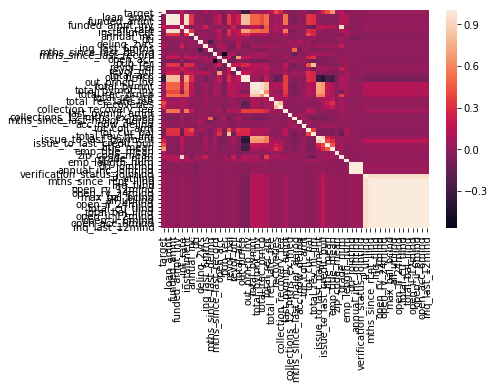

In [45]:
# step 7: get numeric variable's coefficient
# drop all the date, id, member_id, emp_title, title, zip_code

loan_default_missing.head()
num_var = loan_default_missing.select_dtypes(exclude='object')

col = num_var.columns.tolist()
col.remove('target')
col.insert(0,'target')
col
corr = num_var[col].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

# print(loan_default_missing['policy_code'].value_counts(dropna=False))
# loan_default_missing.shape

# # drop policy_code since only has one level
# loan_default_missing.drop(columns=['policy_code'],inplace=True)


(662194, 9)
(662194, 10)
['term', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type']
         term  target_mean
0   36 months     0.086833
1   60 months     0.100019


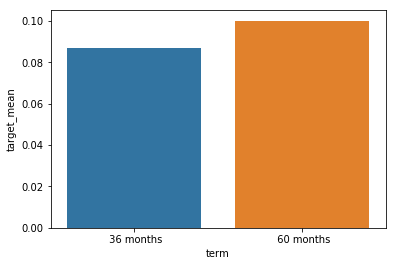

   sub_grade  target_mean
0         A1     0.013453
1         A2     0.022383
2         A3     0.030342
3         A4     0.039071
4         A5     0.038211
5         B1     0.046056
6         B2     0.058435
7         B3     0.069864
8         B4     0.075068
9         B5     0.077477
10        C1     0.082365
11        C2     0.085887
12        C3     0.088426
13        C4     0.091585
14        C5     0.107315
15        D1     0.116778
16        D2     0.137290
17        D3     0.135402
18        D4     0.144784
19        D5     0.145278
20        E1     0.137316
21        E2     0.152114
22        E3     0.153302
23        E4     0.168405
24        E5     0.185781
25        F1     0.195915
26        F2     0.212995
27        F3     0.241410
28        F4     0.245203
29        F5     0.274036
30        G1     0.281831
31        G2     0.269565
32        G3     0.269906
33        G4     0.240909
34        G5     0.308458


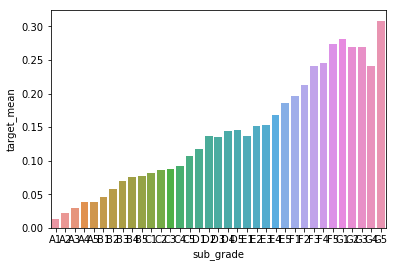

  home_ownership  target_mean
0            ANY     0.000000
1       MORTGAGE     0.080228
2           NONE     0.777778
3          OTHER     0.900000
4            OWN     0.082885
5           RENT     0.107014


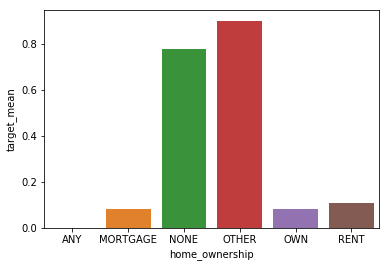

  verification_status  target_mean
0        Not Verified     0.082834
1     Source Verified     0.075607
2            Verified     0.118114


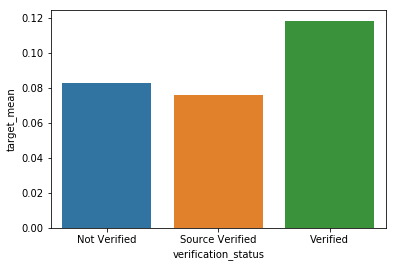

  pymnt_plan  target_mean
0          n     0.091228
1          y     0.625000


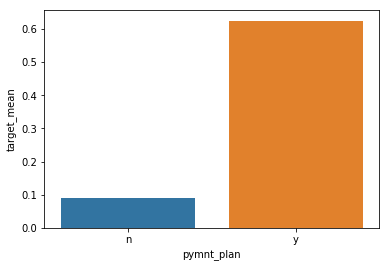

               purpose  target_mean
0                  car     0.099088
1          credit_card     0.065698
2   debt_consolidation     0.094822
3          educational     0.982456
4     home_improvement     0.081769
5                house     0.165992
6       major_purchase     0.100052
7              medical     0.120000
8               moving     0.149591
9                other     0.123010
10    renewable_energy     0.182609
11      small_business     0.245113
12            vacation     0.108623
13             wedding     0.456522


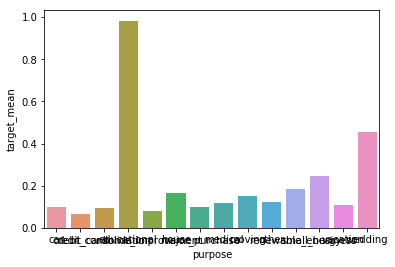

   addr_state  target_mean
0          AK     0.084165
1          AL     0.103432
2          AR     0.087384
3          AZ     0.094686
4          CA     0.104102
5          CO     0.078293
6          CT     0.077340
7          DC     0.064281
8          DE     0.086589
9          FL     0.102218
10         GA     0.083226
11         HI     0.116066
12         IA     0.500000
13         ID     0.250000
14         IL     0.073909
15         IN     0.075430
16         KS     0.074472
17         KY     0.084323
18         LA     0.096306
19         MA     0.090443
20         MD     0.094803
21         ME     0.000000
22         MI     0.087276
23         MN     0.088304
24         MO     0.091137
25         MS     0.048910
26         MT     0.078568
27         NC     0.094698
28         ND     0.006711
29         NE     0.011829
30         NH     0.064446
31         NJ     0.096913
32         NM     0.096463
33         NV     0.116996
34         NY     0.101532
35         OH     0.085640
3

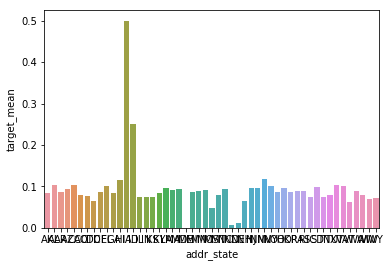

  initial_list_status  target_mean
0                   f     0.136598
1                   w     0.053451


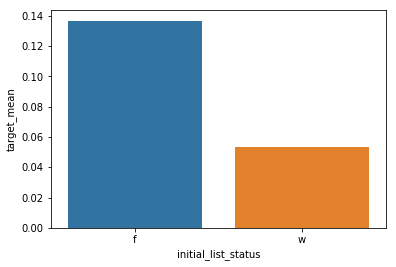

  application_type  target_mean
0       INDIVIDUAL     0.091293
1            JOINT     0.004515


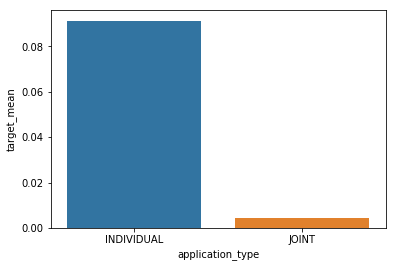

In [16]:
# Step 8:look at the average of target of each categorical variables

loan_final_cha_var = loan_default_missing.select_dtypes(include='object')
target = loan_default_missing['target']
target.head()
print(loan_final_cha_var.shape)

# concatenate loan_final_cha_var with target together by columns, axis=1 by column
# default is outjoin by index
cha_var = pd.concat([loan_final_cha_var,target],axis=1)
print(cha_var.shape)

# find avarage target based on each bins of all categorical variables
def avarage_target_group(var):
    table = cha_var.groupby(var).agg({'target':'mean'}).reset_index()
    table.rename({'target':'target_mean'},inplace=True,axis=1)
    print(table)
    sns.barplot(x=var,y='target_mean',data=table)
    plt.show()

# print all character variable list
cha_var_list = cha_var.columns.tolist()
del cha_var_list[-1]
print(cha_var_list)

for var in cha_var_list:
    avarage_target_group(var)

# ## handle missing values for categorical variable
# #loan_final.replace('NaN',np.nan,inplace=True)
# missing_cha_var = loan_final.isnull().any().index[loan_final.isnull().any()].tolist()
# print(missing_cha_var)
# print(loan_final['verification_status_joint'].isnull().head())

# for var in missing_cha_var:
#     loan_final[var+'_ind'] = np.where(loan_final[var].isnull(),1,0)
#     loan_final[var] = np.where(loan_final[var].isnull(),"Missing",loan_final[var])

# print(loan_final[['verification_status_joint','verification_status_joint_ind']].head())
# loan_final.isnull().any().index[loan_final.isnull().any()]

### or 
# # find categorical variables which has missing values
# categorical_var_missing = data_cat.loc[:,data_cat.isnull().any()].columns.tolist()
# print(categorical_var_missing)

# # replace missing values with 'Missing'
# for var in categorical_var_missing:
#     data_drop[var].fillna('Missing',inplace=True)

loan_final=loan_default_missing.copy()

home_ownership  ANY  MORTGAGE  NONE     OTHER       OWN      RENT
emp_length_num                                                   
0               NaN  0.083179   1.0       NaN  0.081771  0.116689
1               NaN  0.085499   1.0  1.000000  0.094064  0.106493
2               NaN  0.081519   1.0  1.000000  0.090662  0.102921
3               NaN  0.080453   1.0  1.000000  0.091398  0.102397
4               NaN  0.080073   NaN       NaN  0.091573  0.113069
5               NaN  0.091372   NaN  1.000000  0.094035  0.118441
6               NaN  0.103411   1.0  1.000000  0.104456  0.131987
7               0.0  0.093486   NaN  1.000000  0.096623  0.119584
8               NaN  0.079679   NaN       NaN  0.077023  0.098511
9               NaN  0.084588   NaN       NaN  0.082668  0.102719
10              0.0  0.072267   0.5  0.727273  0.069291  0.099212

Bad Rate of Loans By Home Ownership and Employment Length:


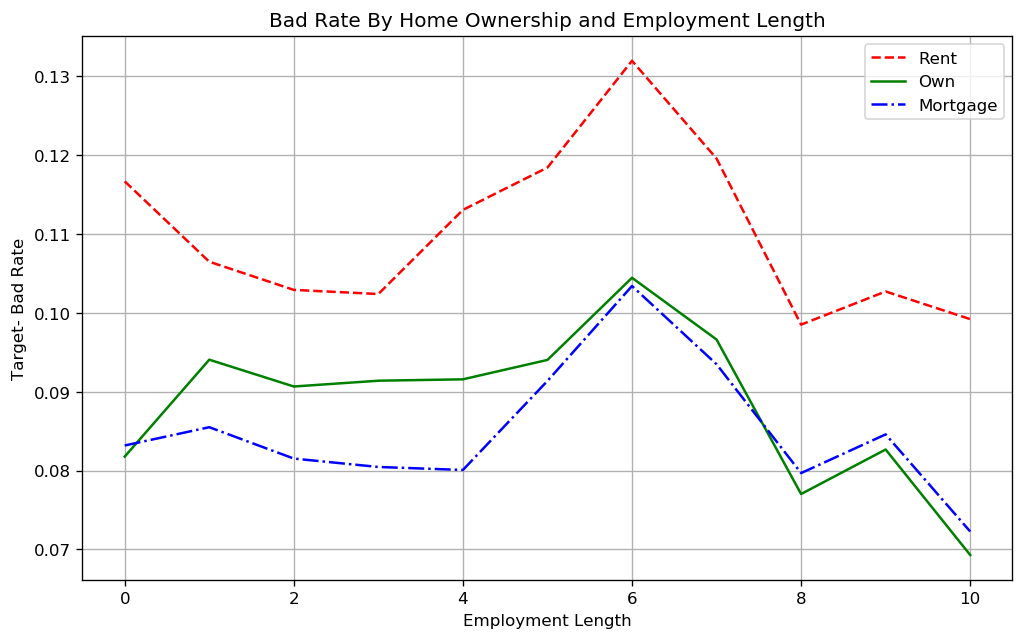

In [49]:
home_emp_df = pd.DataFrame(
    loan_default_missing.pivot_table(
        values='target',index=['emp_length_num'], columns='home_ownership', 
        aggfunc=lambda x: np.mean(x)
    )
)
print(home_emp_df)
print('\nBad Rate of Loans By Home Ownership and Employment Length:') 
home_emp_df.style.format({
    'Any': '{:,.2f}'.format,
    'Mortgage': '{:,.2f}'.format,
    'NONE': '{:,.2f}'.format,
    'OTHER': '{:,.2f}'.format,
    'OWN': '{:,.2f}'.format,
    'RENT': '{:,.2f}'.format,
})

plt.figure(figsize=(10,6), dpi=120)

plt.plot(home_emp_df.index,home_emp_df['RENT'],color='red', linestyle='--', label='Rent')
plt.plot(home_emp_df.index,home_emp_df['OWN'],color='green', linestyle='-', label='Own')
plt.plot(home_emp_df.index,home_emp_df['MORTGAGE'],color='blue', linestyle='-.', label='Mortgage')
plt.ylabel('Target- Bad Rate')
plt.xlabel('Employment Length')

plt.legend(loc='best')
plt.title('Bad Rate By Home Ownership and Employment Length')
plt.grid()
plt.show()
plt.close()

In [17]:
# step 9: create dummy variables
# select columns with object dtypes
object_list = loan_final.select_dtypes(include='object').columns.tolist()
object_list
#convert categorical data to dummy variables 
loan_final = pd.get_dummies(data=loan_final,columns=object_list)
loan_final.head()

loan_final.dtypes

# method 2: change categorical variable to numeric variable
# cat = default_missing.select_dtypes(include='object')
# cat_col = cat.columns.tolist()
# print(cat_col)


# for var in cat_col:
#     t = pd.DataFrame(default_missing.groupby(var).agg({'Survived':np.mean})).reset_index()
#     t.columns=[var,var+'_Mean']
#     default_missing=pd.merge(default_missing,t,on=var,how='left')

# default_missing.head()

# # drop original cat
# final_t = default_missing.drop(columns=cat_col)
# final_t.head()
                            


loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
int_rate                       float64
installment                    float64
annual_inc                     float64
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
out_prncp                      float64
out_prncp_inv                  float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
recoveries                     float64
collection_recovery_fee        float64
last_pymnt_amnt          

In [3]:
import pickle

# loan = open('loan.pickle','wb')
# pickle.dump(loan_final,loan)
# loan.close()

pickle_in = open('loan.pickle','rb')
loan_final = pickle.load(pickle_in)

loan_final.rename({'term_ 36 months':'term_36months'},axis=1,inplace=True)
loan_final.rename({'term_ 60 months':'term_60months'},axis=1,inplace=True)
loan_final.rename({'verification_status_Not Verified':'verification_status_Not_Verified'},axis=1,inplace=True)
loan_final.rename({'verification_status_Source Verified':'verification_status_Source_Verified'},axis=1,inplace=True)

train_data, test_data, train_label, test_label = train_test_split(loan_final.drop('target', axis=1), 
                                                    loan_final['target'], test_size=0.33)

train_data.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'issue_to_last_payment',
 'issue_to_last_credit_pull',
 'grade_num',
 'emp_length_num',
 'dti_jointlnd',
 'annual_inc_jointlnd',
 'verification_status_jointlnd',
 'il_utillnd',
 'mths_since_rcnt_illnd',
 'max_bal_bclnd',
 'total_bal_illnd',
 'open_rv_12mlnd',
 'open_rv_24mlnd',
 'open_il_6mlnd',
 'all_utillnd',
 'open_il_12mlnd',
 'inq_filnd',
 'total_cu_tllnd',
 'inq_last_12mlnd',
 'open_acc_6mlnd',
 'open_i

In [5]:
# separate training and test dataset

# n_estimators = number of trees in the foreset
# criterion: the measure used to find attribute to split node, gini means gini index(as low as better), entropy mean information gain(as large as better)
# max_features = max number of features considered for splitting a node(default is auto, auto = sqrt(n_features))
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap(default=true): whether use bootstrap samples to when building trees (with or without replacement)
# oob_score: where use out of bag sample to estimate accuracy



# # all the data fit to scikit learn model need to change to matrix 
# # Gini index select the best variables that creates most homogeneous/simiar sub-nodes to split parent nodes

modelrf = RandomForestClassifier(random_state=0,
                              n_estimators=100,
                              max_features=6,
                              max_depth=5)
training_start = time.perf_counter()
modelrf.fit(train_data,train_label)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = modelrf.predict(test_data)
prediction_end = time.perf_counter()

acc_rfc = (preds == test_label).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start


print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

# cv in gridsearch
# there are n combination to hyperparameter settings and each setting iterate a entire cross validation
# process. In the process select the best hyperparameter settings. 
# If there are 50 settings of hyperparameters and cv folder as 10, it represents 500 training loops.
# good model should consider both performance and speed



Scikit-Learn's Random Forest Classifier's prediction accuracy is: 94.29
Time consumed for training: 28.460 seconds
Time consumed for prediction: 2.46727 seconds


In [6]:
# xgboost model
# https://www.kaggle.com/dansbecker/xgboost
# xgbclassifier default is binary:logistic


# n_jobs is equal to number of cores in your machine, it helps when you have large files
# first look at how many cpu in your computer, how many cores for each cpu
# number of cores= N(cpu)*N(cores in each cpu)
xgb = XGBClassifier(n_estimators=100,
                   max_depth=5,
                   learning_rate=0.2,
                   seed=123,
                   n_jobs=8)

training_start = time.perf_counter()
xgb.fit(train_data.as_matrix(), train_label.as_matrix())
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = xgb.predict(test_data.as_matrix())
prediction_end = time.perf_counter()

acc_xgb = (preds == test_label).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start


print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


XGBoost's prediction accuracy is: 99.22
Time consumed for training: 59.330
Time consumed for prediction: 1.03927 seconds


C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
# neural network
# use the same number of neurons as input variables as starting points
# the weights are initialed using a small gaussian(normal distribution) randomnumber. 

# from keras.models import Sequential
# from keras.layers import Dense


# only output errors
tf.logging.set_verbosity(tf.logging.ERROR)

# define initial hyperparameters
batch_size = 1
train_steps = 1000
hidden_units=[10,10]
train_data.keys()


# create a numeric column for every column of the training set
feature_cols = []
for key in train_data.keys():
     feature_cols.append(tf.feature_column.numeric_column(key=key))

feature_cols

# build model with input function
dnn = tf.estimator.DNNClassifier(hidden_units=hidden_units, feature_columns=feature_cols, n_classes=3)

input_fn = tf.estimator.inputs.pandas_input_fn(x=train_data, 
                                               y=train_label,
                                               batch_size=batch_size,
                                               shuffle=False)

# fit the DNN to the training data
training_start = time.perf_counter()
dnn.train(input_fn = input_fn, steps=train_steps)
training_end = time.perf_counter()

# predict test data
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=test_data, shuffle=False)

prediction_start = time.perf_counter()
preds = dnn.predict(input_fn=predict_input_func)
prediction_end = time.perf_counter()

# evaluate results
final_preds = []
for pred in preds:
    final_preds.append(pred['class_ids'][0])
    
acc_dnn = (final_preds == test_label).sum().astype(float) / len(final_preds)*100
dnn_train_time = training_end-training_start
dnn_prediction_time = prediction_end-prediction_start

print("Dense Neural Network Classifier's prediction accuracy is: %3.2f" % (acc_dnn))
print("Time consumed for training: %4.3f seconds" % (dnn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dnn_prediction_time))



C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Dense Neural Network Classifier's prediction accuracy is: 90.76
Time consumed for training: 29.003 seconds
Time consumed for prediction: 0.00036 seconds


In [9]:
# combine model performance result 
results = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'DNN'],
    'Score': [ acc_xgb, acc_rfc, acc_dnn],
    'Runtime Training': [ xgb_train_time, rfc_train_time,  dnn_train_time],
    'Runtime Prediction': [ xgb_prediction_time, rfc_prediction_time, dnn_prediction_time]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,99.222972,59.329948,1.039266
Random Forest,94.288525,28.460320,2.467268
DNN,90.760325,29.002652,0.000362


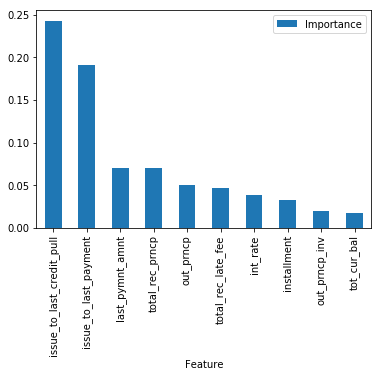

In [14]:
# show xgboost variable importance: based on how often the variable used to split trees 
importances = pd.DataFrame({
    'Feature': train_data.columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances[:10]

importances[:10].plot.bar()

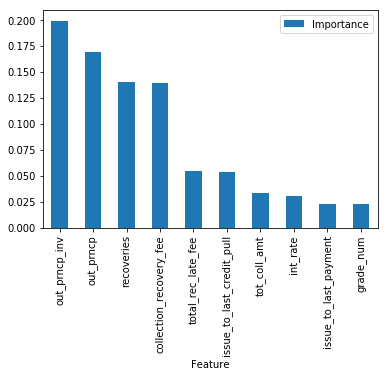

In [15]:
# show three algothim variable importance of random forest: use the accuracy decreses if the variable is exclude out(shuffle) as the measurement
importances = pd.DataFrame({
    'Feature': train_data.columns,
    'Importance': modelrf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances[:10]

importances[:10].plot.bar()

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


[0 0 0 0 0]
col_0        0      1
target               
0       198533     47
1         1651  18294


C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


21852
21857
     Pred_Prob                     target
          size      amin      amax    sum
Rank                                     
1      21852.0  0.000103  0.000888      1
2      21852.0  0.000888  0.001478      3
3      21852.0  0.001478  0.002235      9
4      21852.0  0.002235  0.003325     25
5      21852.0  0.003325  0.004693     26
6      21852.0  0.004693  0.006557     49
7      21852.0  0.006557  0.009727     99
8      21852.0  0.009727  0.017037    205
9      21852.0  0.017037  0.059565    593
10     21857.0  0.059597  1.000000  18935
recall/sensitivity is: 0.91722
specificity is: 0.99976
precision is: 0.99744
AUROC is: 0.9922583064753483


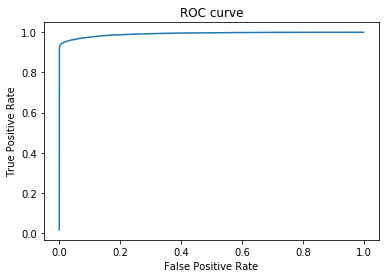

In [64]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# xgboost model evaluation
# confusion matrix
test_data2 = test_data.copy()
preds = xgb.predict(test_data.as_matrix())
print(preds[:5])
cm = pd.DataFrame(pd.crosstab(test_label,preds))
print(cm)

# Predicted Probablity vs Actual

predict_proba= xgb.predict_proba(test_data.as_matrix())
test_data2['Pred_Prob'] = predict_proba[:,1]

PredProb_Actual = pd.merge(test_data2,pd.DataFrame(test_label),left_index=True,right_index=True,how='left')
PredProb_Actual_Col = PredProb_Actual[['target','Pred_Prob']]
PredProb_Actual_Col.sort_values(by=['Pred_Prob'],inplace=True)

X1=round(PredProb_Actual_Col.shape[0]/10)
X2=PredProb_Actual_Col.shape[0] - X1*9
print(X1)
print(X2)
PredProb_Actual_Col['Rank']= np.repeat([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[X1, X1, X1, X1, X1, X1, X1, X1, X1,X2])
PredProb_Actual_Col.head()
print(PredProb_Actual_Col.groupby(['Rank']).agg({'Pred_Prob':[np.size,np.min,np.max],'target':[np.sum]}))

# Sensitivity, Specificity, Precision
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

print("recall/sensitivity is: %3.5f" % (cm.loc[1,1]/(cm.loc[1,0]+cm.loc[1,1])) ) # among all the acutal positive, how much are predicted as positive
print("specificity is: %3.5f" % (cm.loc[0,0]/(cm.loc[0,0]+cm.loc[0,1])) ) # among all the actual negative, how much are predicted as negative
print("precision is: %3.5f" % (cm.loc[1,1]/(cm.loc[0,1]+cm.loc[1,1])) ) # among all the predicted as positive, how many of them are actual positive

# AUROC

print("AUROC is:",roc_auc_score(test_label, predict_proba[:,1]))
fpr, tpr, _ = roc_curve(test_label, predict_proba[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()



out_prncp                    0.254074
out_prncp_inv                0.197784
emp_title_mean               0.111968
collection_recovery_fee      0.081225
title_mean                   0.046076
recoveries                   0.038447
issue_to_last_credit_pull    0.022693
issue_to_last_payment        0.019269
total_rec_late_fee           0.018490
total_rec_prncp              0.010509
total_pymnt_inv              0.010300
dtype: float64
Index(['out_prncp', 'out_prncp_inv', 'emp_title_mean',
       'collection_recovery_fee', 'title_mean', 'recoveries',
       'issue_to_last_credit_pull', 'issue_to_last_payment',
       'total_rec_late_fee', 'total_rec_prncp', 'total_pymnt_inv'],
      dtype='object')


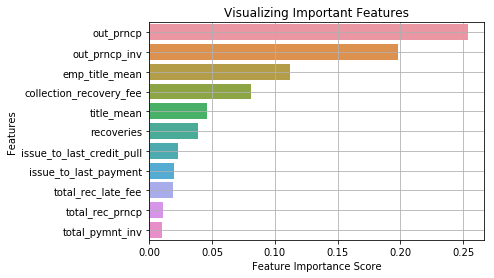

In [72]:
#create variable importance chart
import seaborn as sns
feature_imp = pd.Series(
    model.feature_importances_,
    index = train_data.columns).sort_values(ascending=False)
print(feature_imp[feature_imp.values>=0.01])
print(feature_imp[feature_imp.values>=0.01].index)

# Creating a bar plot
# Pick up importance >= 0.01
sns.barplot(x=feature_imp[feature_imp.values>=0.01], y=feature_imp[feature_imp.values>=0.01].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.grid()
plt.show()


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
0.0      900.0
0.1     5000.0
0.2     7600.0
0.3    10000.0
0.4    11900.0
0.5    14000.0
0.6    16000.0
0.7    19750.0
0.8    22750.0
0.9    28000.0
1.0    35000.0
Name: loan_amnt, dtype: float64
(865.9, 4310.0]        42091
(4310.0, 7720.0]       91187
(7720.0, 11130.0]     121028
(11130.0, 14540.0]     91289
(14540.0, 17950.0]     84885
(17950.0, 21360.0]     87761
(21360.0, 24770.0]     40114
(24770.0, 28180.0]     44532
(28180.0, 31590.0]     22245
(31590.0, 35000.0]     37062
Name: loan_amnt, dtype: int64


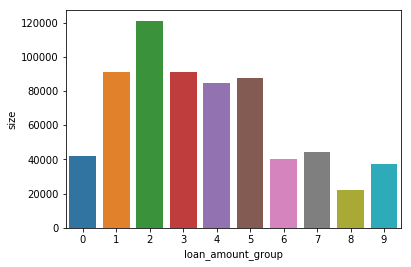

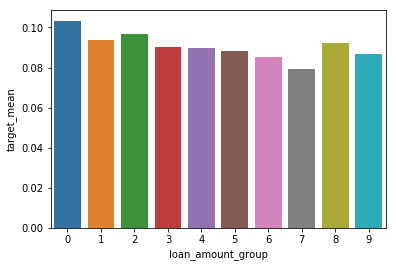

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


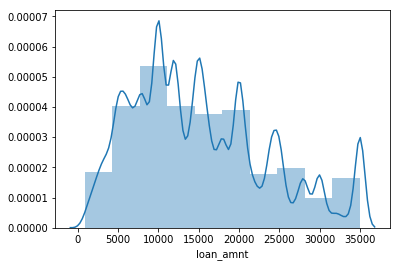

In [58]:
# # could delete
# # create ind of loan loan_amnt
# loan['Ind'] = [x>5000 for x in loan['loan_amnt']]
# print(ind)
# loan.head()
# sum(loan['Ind'])

# loan amount analysis
loan_default_missing.groupby('loan_amnt').agg({'target':['mean','size']})

# calculate loan_amnt quantiles 
quan = np.arange(0.0,1.1,0.1)
print(quan)
print(loan_default_missing['loan_amnt'].quantile(quan))

loan_amount_qcut = pd.qcut(loan_default_missing['loan_amnt'],10)
loan_amount_qcut.value_counts(sort=False)


# split loan_amount to 10 group, each group has equal length
loan_amount_group = pd.cut(loan_default_missing['loan_amnt'],10,labels=False)
print(pd.cut(loan_default_missing['loan_amnt'],10).value_counts(sort=False))

loan_amount_table = pd.DataFrame(loan_default_missing.groupby(loan_amount_group).
             agg({'target':['mean','size']})).reset_index()

# change multi_index column names
loan_amount_table.columns = ['loan_amount_group','target_mean','size']
loan_amount_table

sns.barplot(x='loan_amount_group',y='size',data=loan_amount_table)
plt.show()
sns.barplot(x='loan_amount_group',y='target_mean',data=loan_amount_table)
plt.show()
sns.distplot(loan['loan_amnt'],bins=10)
plt.show()



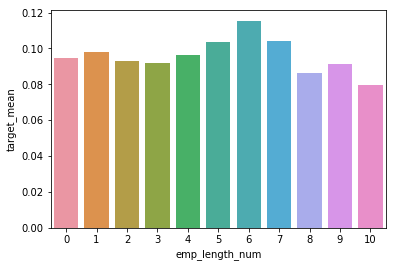

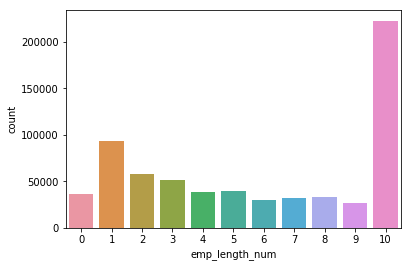

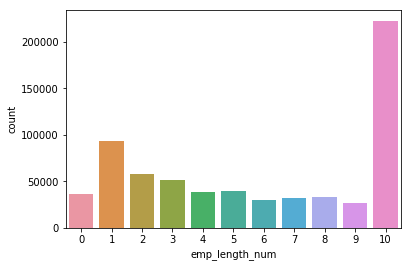

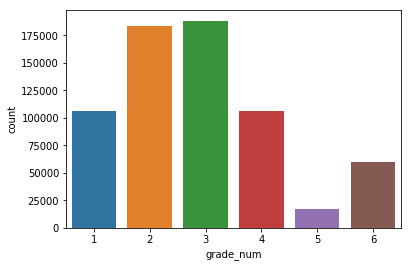

   grade_num   loan_amount_group  target_mean
0          1     (865.9, 4310.0]     0.087285
1          1    (4310.0, 7720.0]     0.040659
2          1   (7720.0, 11130.0]     0.032711
3          1  (11130.0, 14540.0]     0.028153
4          1  (14540.0, 17950.0]     0.027025


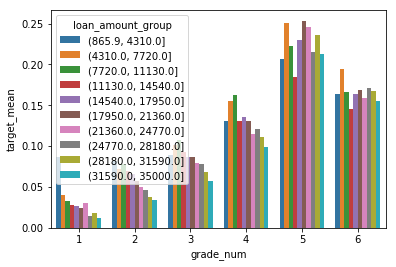

In [147]:
# # employement length vs target
emp_target = pd.DataFrame(loan_addInd.groupby('emp_length_num').agg({'target':[np.size,np.mean]})).reset_index()
emp_target.columns = ['emp_length_num','count','target_mean']
sns.barplot(x='emp_length_num',y='target_mean',data=emp_target)
plt.show()
sns.barplot(x='emp_length_num',y='count',data=emp_target)
plt.show()
sns.countplot(x='emp_length_num',data=loan_addInd)
plt.show()



# grade analysis
sns.countplot(x='grade_num',data=loan_addInd)
plt.show()

#  analysis - pivot table of loan_amount_group with grade 
# pd.cut loan_amnt to 10 equal length
loan_addInd['loan_amount_group']= pd.cut(loan_addInd['loan_amnt'],10) #labels=False
loan_addInd[['loan_amnt','loan_amount_group']].head()

pivot_loanamt_grade = loan_addInd.pivot_table(index='grade_num',
                                       columns='loan_amount_group',
                                       values='target',
                                       aggfunc=np.mean)
pivot_loanamt_grade

# calculate target mean based on grade and amount group 
loan_amount_groupby = loan_addInd.groupby(['grade_num','loan_amount_group'
                                   ]).agg({'target':'mean'}).reset_index()
loan_amount_groupby.head()

# rename 
loan_amount_groupby.rename({'target':'target_mean'},axis=1,inplace=True)
print(loan_amount_groupby.head())

# barplot with two levels on x
sns.barplot(x='grade_num',y='target_mean',hue='loan_amount_group',data=loan_amount_groupby)
plt.show()


# # calculate each grade percentage
# grade_pt = loan['grade'].value_counts(dropna=False).sort_index().div(loan['grade'].value_counts(dropna=False).sort_index().sum(),
#                                                          axis=0).reset_index()
# grade_pt.rename({'grade':'percentage'},axis=1,inplace=True) # axis=1 is to change column name
# grade_pt 

# # plt.title('Histogram of Annual Income')
# # plt.xlabel('Income')
# # plt.ylabel('Borrowers')


In [145]:
# separate numeric and categorical data 
loan_2_num = loan_2.select_dtypes(include=['float64','int64'])
loan_2_cha = loan_2.select_dtypes(include=['object'])
print(loan_2_num.shape)
print(loan_2_cha.shape)
loan_2_cha.head()
loan_2_num.head()
print(loan_2_num.columns.tolist())

# look at the distribution of all the numeric variables
# for var in loan_2_num.columns.tolist():
#     sns.distplot(loan_2_num[var])
#     plt.show()


NameError: name 'loan_2' is not defined

In [281]:
# distribution of numeric variables 
print(loan_2_num.describe())


# value counts of all the categorical data
for name in loan_2_cha.columns.values:
    print(loan_2_cha[name].value_counts(dropna=False))
    



           loan_amnt    funded_amnt  funded_amnt_inv       int_rate  \
count  662194.000000  662194.000000    662194.000000  662194.000000   
mean    15202.202829   15197.494616     15182.889947      13.224772   
std      8492.955966    8489.985911      8488.829238       4.416632   
min       900.000000     900.000000         0.000000       5.320000   
25%      8725.000000    8725.000000      8700.000000       9.990000   
50%     14000.000000   14000.000000     14000.000000      12.990000   
75%     20000.000000   20000.000000     20000.000000      16.290000   
max     35000.000000   35000.000000     35000.000000      28.990000   

         installment    annual_inc            dti    delinq_2yrs  \
count  662194.000000  6.621940e+05  662194.000000  662194.000000   
mean      444.138236  7.526168e+04      18.777747       0.334805   
std       243.350787  6.549911e+04      19.332331       0.896196   
min        21.620000  0.000000e+00       0.000000       0.000000   
25%       267.600000

How many numeric variables in? 52


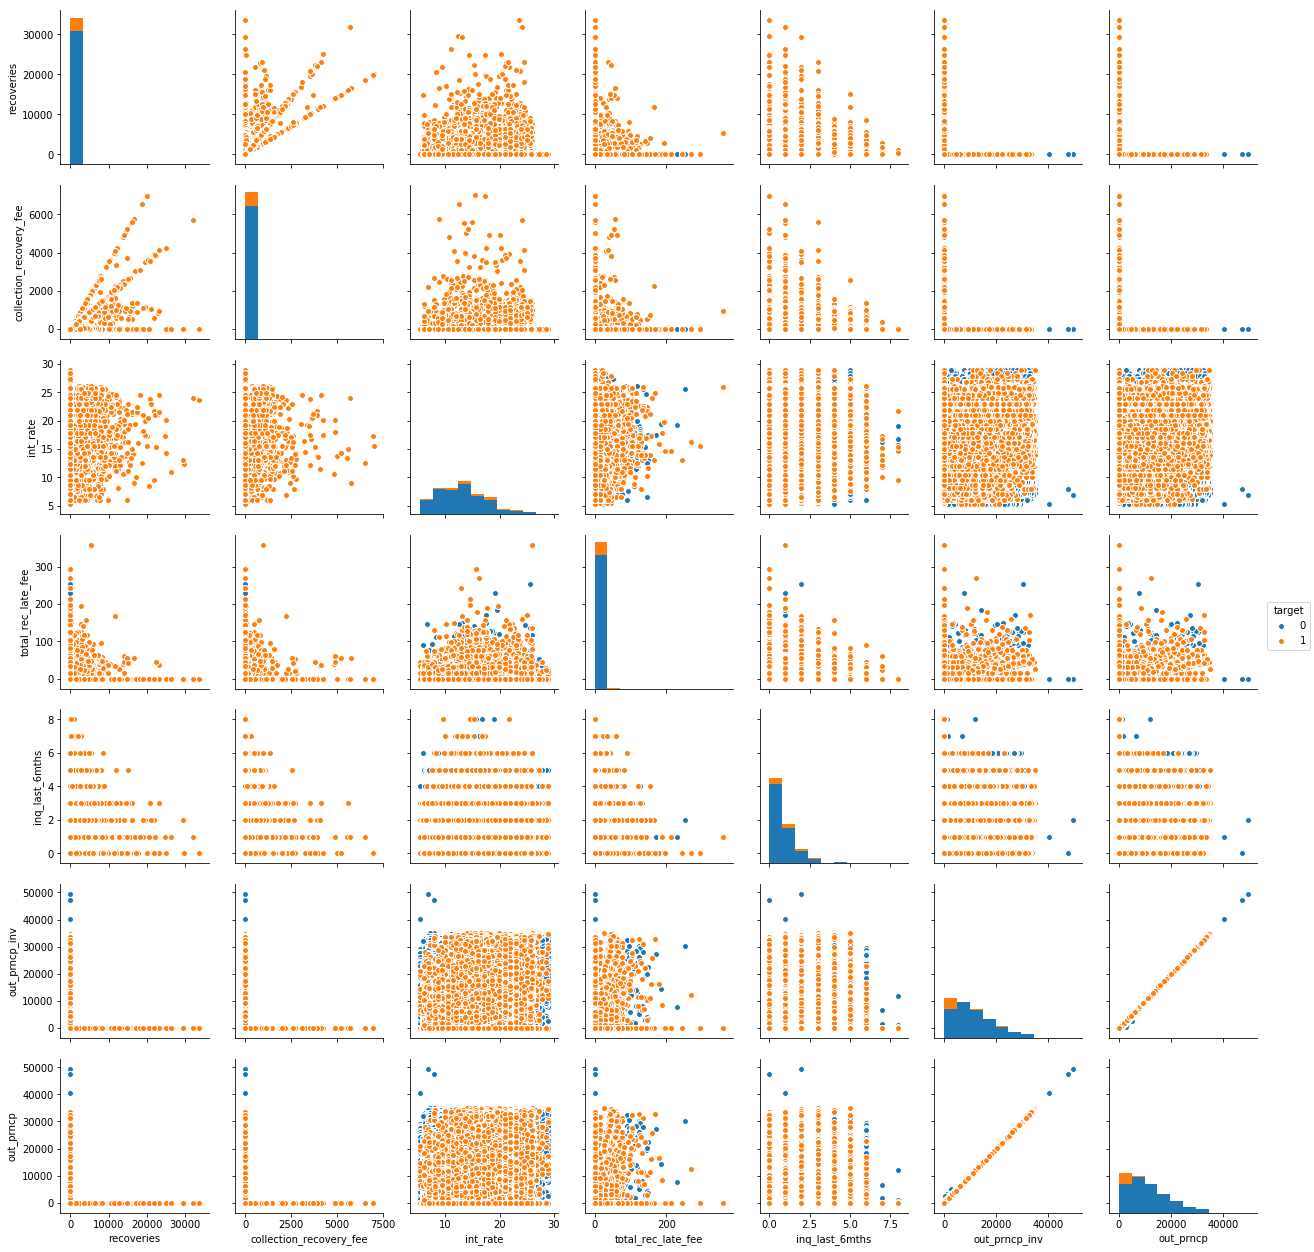

In [341]:
# look at the correlation coefficient between target with all numeric variabes
loan_final_num_vars = loan_final.select_dtypes(exclude='object')
loan_final_num_vars.head()
print('How many numeric variables in?', len(loan_final_num_vars.columns.tolist()))

corr_mat = loan_final_num_vars.corr()
corr_mat["target"].sort_values(ascending=False)

# use scatter_matrix function to look at the correlation of each numeric attributes with other numeric attributes
# since there are 52 numeric variables in the dataset. only select few variables to look at the correlation cofficient
#import pandas.plotting.scatter_matrix as scatter_matrix

attributes = ['recoveries',
'collection_recovery_fee',
'int_rate',
'total_rec_late_fee',
'inq_last_6mths',
'out_prncp_inv',
'out_prncp']
loan_final[attributes].head()

sns.pairplot(loan,hue='target',
            x_vars=attributes,
            y_vars=attributes)
plt.show()

In [347]:
# pick up 17 most important variables to run tensorflow models
features = ['out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'recoveries',
       'total_rec_late_fee', 'int_rate', 'tot_cur_bal', 'last_pymnt_amnt',
       'total_pymnt_inv', 'total_rec_int', 'tot_coll_amt', 'total_rec_prncp',
       'total_pymnt', 'revol_bal', 'total_rev_hi_lim', 'dti', 'revol_util']

train_data_features = train_data[features]
test_data_features = test_data[features]

train_data_features.info()
train_data_features2 = train_data_features #.iloc[:100000,:]
train_label_features2 = train_label #[:100000]
train_data_features2
train_label_features2
print(type(train_label_features2))

# change to matrix
train_data_features2_m = train_data_features2.values
train_label_features2_m = train_label_features2.values

print(train_data_features2_m)
print(train_label_features2_m)
print(type(train_label_features2_m))

# the same process for test dataset
test_data_features2 = test_data_features #.iloc[:100000,:]
test_label_features2 = test_label #[:100000]
test_data_features2
test_label_features2
print(type(test_label_features2))

# change to matrix
# as_matrix is the same as .values
test_data_features2_m = test_data_features2.values
test_label_features2_m = test_label_features2.values

print(test_data_features2_m)
print(test_label_features2_m)
print(type(test_label_features2_m))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 529755 entries, 115666 to 545685
Data columns (total 17 columns):
out_prncp                  529755 non-null float64
out_prncp_inv              529755 non-null float64
collection_recovery_fee    529755 non-null float64
recoveries                 529755 non-null float64
total_rec_late_fee         529755 non-null float64
int_rate                   529755 non-null float64
tot_cur_bal                529755 non-null float64
last_pymnt_amnt            529755 non-null float64
total_pymnt_inv            529755 non-null float64
total_rec_int              529755 non-null float64
tot_coll_amt               529755 non-null float64
total_rec_prncp            529755 non-null float64
total_pymnt                529755 non-null float64
revol_bal                  529755 non-null float64
total_rev_hi_lim           529755 non-null float64
dti                        529755 non-null float64
revol_util                 529755 non-null float64
dtypes: float64(1

In [348]:
# tesorflow logistic model
# create our parameters and placeholders for X andy Y to feed them with the data above
import tensorflow as tf
sess = tf.Session()

# create graph object
tf.reset_default_graph()
graph = tf.Graph()

train_num = len(train_label_features2)
test_num = len(test_label_features2)

# convert to tensor
train_tensor = tf.convert_to_tensor(train_data_features2_m, dtype=tf.float32)
train_label_tensor = tf.convert_to_tensor(train_label_features2_m, dtype=tf.float32)
train_label_tensor = tf.reshape(train_label_tensor,[train_num,1])
print(train_tensor)
print(train_label_tensor)

test_tensor = tf.convert_to_tensor(test_data_features2_m, dtype=tf.float32)
test_label_tensor = tf.convert_to_tensor(test_label_features2_m, dtype=tf.float32)
test_label_tensor = tf.reshape(test_label_tensor,[test_num,1])
print(test_tensor)
print(test_label_tensor)

# Inference is the model here
# why it is [5,1] is because there are 5 features and 1 response variable
W = tf.Variable(tf.zeros([17,1]),name='weights')
b = tf.Variable(0.,name='bias')

# former inference is now used for combining inputs
def combine_inputs(X):
    return tf.matmul(X,W) + b

# new inference value is the sigmoid applied to the former
# inference is the model 
def inference(X):
    return tf.sigmoid(combine_inputs(X))

# cross entropy loss function
#def loss(X,Y):
#    return tf.reduce_mean(-tf.log(inference(X)*Y + (1-inference(X)) * (1-Y)))

#or could use 
def loss(X,Y):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( \
        logits= combine_inputs(X),labels= Y))

# let's use gradient descent to train our model to find the optimum
def train(total_loss):
    learning_rate = 0.01
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

#calculate accuracy 
def evaluate(sess,X,Y):
    predicted = tf.cast(inference(X)>0.5,tf.float32)
    
    print(sess.run(tf.reduce_mean(tf.cast(tf.equal(predicted,Y),tf.float32))))


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    X,Y=train_tensor,train_label_tensor
    X_test,Y_test=test_tensor,test_label_tensor
    total_loss=loss(X,Y)
    train_op=train(total_loss)
    coord=tf.train.Coordinator()
    threads=tf.train.start_queue_runners(sess=sess,coord=coord)
     
    #actual training loop. Here we train the model 1000 time to gradually to find the 
    #global minimum(best coefficient of the logistic regression)
    training_steps=1000
    for step in range(training_steps):
        sess.run([train_op])
        # for debugging and learning purposes, see how the loss gets
        # decremented thru training steps
        if step % 10==0:
            print('loss: ',sess.run([total_loss]))
            
    evaluate(sess,X,Y)
    evaluate(sess,X_test,Y_test)

#     import time 
#     time.sleep(5)
    
    # Open a SummaryWriter to save summaries
    writer = tf.summary.FileWriter('/Users/shiwenwang/Documents/Python/finalproject', sess.graph)
    # Write the summaries to disk
    writer.flush()      
    # close
    writer.close()
    
    coord.request_stop()
    coord.join(threads)
    sess.close()


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("Const:0", shape=(529755, 17), dtype=float32)
Tensor("Reshape:0", shape=(529755, 1), dtype=float32)
Tensor("Const_2:0", shape=(132439, 17), dtype=float32)
Tensor("Reshape_1:0", shape=(132439, 1), dtype=float32)
loss:  [5850864.0]
loss:  [10229453.0]
loss:  [1077917.1]
loss:  [4891882.0]
loss:  [1842019.1]
loss:  [2219127.0]
loss:  [2166485.2]
loss:  [4872206.0]
loss:  [1544162.2]
loss:  [6047399.0]
loss:  [1108889.2]
loss:  [3881734.0]
loss:  [6871565.5]
loss:  [1274791.9]
loss:  [2624637.2]
loss:  [3379401.8]
loss:  [6918726.0]
loss:  [246775.02]
loss:  [3216025.2]
loss:  [5461983.0]
loss:  [482207.72]
loss:  [4328443.0]
loss:  [5957131.5]
loss:  [1935978.6]
loss:  [472551.2]
loss:  [2322340.0]
loss:  [3658288.2]
loss:  [1635149.4]
loss:  [360185.0]
loss:  [411336.44]
loss:  [2355503.0]
loss:  [1698974.1]
loss:  [6171251.5]
loss:  [7204622.0]
loss:  [621592.2]
loss:  [5053927.0]
loss:  [4658983.5]
loss:  [2530919.2]
loss:  [3675587.2]
loss:  [685048.8]
loss:  [7081170.0]
loss: 

In [349]:
# k-means model

import numpy as np
import tensorflow as tf
from tensorflow.contrib.factorization import KMeans

# create graph object
tf.reset_default_graph()
graph = tf.Graph()

# Training data
full_data_x = train_data_features2_m

# Parameters
num_steps = 50 # Total steps to train
k = 2 # The number of clusters
num_classes = 2 # 2 classes, 0 and 1 in our data
num_features = 17 # Feature numbers

# Placeholder for X and Y
X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# K-Means Parameters
kmeans = KMeans(inputs=X, num_clusters=k, distance_metric='cosine',
                use_mini_batch=True)

# Build KMeans graph
training_graph = kmeans.training_graph()

# train_op is optimizer
if len(training_graph) > 6: 
    (all_scores, cluster_idx, scores, cluster_centers_initialized,
     cluster_centers_var, init_op, train_op) = training_graph
else:
    (all_scores, cluster_idx, scores, cluster_centers_initialized,
     init_op, train_op) = training_graph

cluster_idx = cluster_idx[0] # fix for cluster_idx being a tuple
avg_distance = tf.reduce_mean(scores)

# Initialize the variables 
init_vars = tf.global_variables_initializer()

# Start TensorFlow session
sess = tf.Session()

# Run the initializer
sess.run(init_vars, feed_dict={X: full_data_x})
sess.run(init_op, feed_dict={X: full_data_x})

# Training model
for i in range(1, num_steps + 1):
    _, d, idx = sess.run([train_op, avg_distance, cluster_idx],
                         feed_dict={X: full_data_x})
    if i % 10 == 0 or i == 1:
        print("Step %i, Avg Distance: %f" % (i, d))

# Assign a label to each centroid
# Count total number of labels per centroid, using the label of each training
# sample to their closest centroid (given by 'idx')
counts = np.zeros(shape=(k, num_classes))
for i in range(len(idx)):
    counts[idx[i]] += train_label_features2_m[i]
# Assign the most frequent label to the centroid
labels_map = [np.argmax(c) for c in counts]
labels_map = tf.convert_to_tensor(labels_map)

# Evaluation ops
# Lookup: centroid_id -> label
cluster_label = tf.nn.embedding_lookup(labels_map, cluster_idx)
# Compute accuracy
correct_prediction = tf.equal(cluster_label, tf.cast(tf.argmax(Y, 1), tf.int32))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Test Model
test_x, test_y = test_data_features2_m ,pd.get_dummies(test_label_features2_m).values
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: test_x, Y: test_y}))

# Open a SummaryWriter to save summaries
writer = tf.summary.FileWriter('/Users/shiwenwang/Documents/Python/finalproject', sess.graph)
# Write the summaries to disk
writer.flush()      
# close
writer.close()
sess.close()


Instructions for updating:
dim is deprecated, use axis instead
Step 1, Avg Distance: 0.058602
Step 10, Avg Distance: 0.040582
Step 20, Avg Distance: 0.040544
Step 30, Avg Distance: 0.040533
Step 40, Avg Distance: 0.040527
Step 50, Avg Distance: 0.040524
Test Accuracy: 0.9085239
